# 6. DEEP LEARNING USING ARTIFICIAL NEURAL NETWORK

* In this notebook, i will create an ANN model: Multi-layer NN using KerasClassifier.
* I did also EDA, Visualisation and Machine Learning study for same topic in my notebook linked below.
* You can have a look and vote if you enjoy.


  https://www.kaggle.com/ozkanozturk/ml-model-with-86-7-accuracy

The story: A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon

[6.1. Data Preparation](#6.1) <br>
>[6.1.1. Loading Libraries](#6.1.1) <br>
>[6.1.2. Reading Data](#6.1.2) <br>
>[6.1.3. Dropping unnecessary columns](#6.1.3) <br>
>[6.1.4. Normalizig/Rescaling Data](#6.1.4) <br>
>[6.1.5. Converting data types to Categorical](#6.1.5) <br>
>[6.1.6. Converting columns to Categorical](#6.1.6) <br>

[6.2. Multi-Layer Neural Network with Keras](#6.2) <br>
>[6.2.1. Creating X_train, y_train](#6.2.1) <br>
>[6.2.2. Train-Test split](#6.2.2) <br>
>[6.2.3. Feature Scaling with StandardScaler](#6.2.3) <br>
>[6.2.4. Modelling Using KerasClassifier](#6.2.4) <br>
>>[6.2.4.1. Defining a function to pass by `build_fn` argument](#6.2.4.1) <br>
>>[6.2.4.2. Creating Model with default `batch_size`](#6.2.4.2) <br>
>>[6.2.4.3. Fiting Model](#6.2.4.3) <br>
>>[6.2.4.4. Creating Model with a decreased `batch_size`](#6.2.4.4) <br>
>>[6.2.4.5. Evaluating model with `cross_val_score` and `StratifiedKFold`](#6.2.4.5) <br>
>>[6.2.4.6 Deep Learning with Grid Search](#6.2.4.6) <br>

<a id="6.1"></a>
# 6.1. DATA PREPARATION

<a id="6.1.1"></a>
## 6.1.1. Loading Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="6.1.2"></a>
## 6.1.2. Reading Data

In [ ]:
data = pd.read_csv("/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv")
data.head()

<a id="6.1.3"></a>
## 6.1.3. Dropping unnecessary columns

In [ ]:
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace = True)

In [ ]:
data.head(2)

<a id="6.1.4"></a>
## 6.1.4. Normalizing (Rescaling) data 

* Rescaling data to have values between 0 and 1. 
* This is usually called feature scaling. One possible formula to achieve this is:
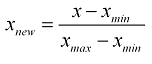

In [ ]:
# CreditScore, Age, Tenure, Balance, EstimatedSalary to be rescaled:

for each in ["CreditScore", "Age","Tenure", "Balance", "EstimatedSalary"]:
    data[each] = (data[each] - np.min(data[each])) / (np.max(data[each])-np.min(data[each]))


In [ ]:
data.head()

<a id="6.1.5"></a>
## 6.1.5. Converting data types to categorical

In [ ]:
# looking at current types:
data.info()

* From above info, although there are some categorical columns (such as Gender:Male-Female); data types are not categorical.
* They are object (as in Gender), integer (as in HasCrCard and Exited)
* So, i need to convert data types to categorical.
* Thus we prevent model to get 1 and 0 as weights of features.

In [ ]:
# converting type of some features to category
for each in ["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember","Exited"]:
    data[each] = data[each].astype("category")

In [ ]:
# types after conversion
data.info()

In [ ]:
data.info()

<a id="6.1.6"></a>
## 6.1.6. Converting some columns to categoricals(Numericals)

* Geography ---> Geography_France / Geography_Spain / Geography_Germany
* Gender ---> Gender_Female / Gender_Male
* NumOfProducts ---> NumOfProducts_1 / NumOfProducts_2 / NumOfProducts_3 / NumOfProducts_4 

In [ ]:
data = pd.get_dummies(data, columns = ["Geography","Gender", "NumOfProducts"])

In [ ]:
data.head()

In [ ]:
data.info()

<a id="6.2"></a>
# 6.2 MULTI LAYER NEURAL NETWORK WITH KERAS

<a id="6.2.1"></a>
## 6.2.1. Creating X_train and y_train

In [ ]:
X_train = data.drop(columns = ["Exited"], axis=1)

In [ ]:
y_train = data["Exited"]

<a id="6.2.2"></a>
## 6.2.2. Train - Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train, 
    y_train,
    test_size = 0.33,
    random_state = 42
)

print("Length of X_train: ",len(X_train))
print("Length of X_test: ",len(X_test))
print("Length of y_train: ",len(y_train))
print("Length of y_test: ",len(y_test))

In [ ]:
print(
    "Shape of X_train: ",np.shape(X_train),
    "\nShape of y_train: ",np.shape(y_train)
)

<a id="6.2.3"></a>
## 6.2.3. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X_train.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X_test.columns.values)

<a id="6.2.4"></a>
## 6.2.4. Modelling Using KerasClassifier

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential     # Neural network library
from keras.layers import Dense          # layer library


<a id="6.2.4.1"></a>
### 6.2.4.1. Defining a function to pass by build_fn argument

* KerasClassifier class in Keras takes an argument `build_fn` which is the name of the function to call to get your model.
* We must define a function that defines our model, compiles it and returns it.
* Defining function named as `create_model` :

In [ ]:
def create_model():
    
    # create model
    model = Sequential()
    
    # adding input layer
    model.add(Dense(units = 12, kernel_initializer = "uniform", activation = "relu", input_dim = 16))
    
    # adding layer
    model.add(Dense(units = 8, kernel_initializer = "uniform", activation = "relu"))
    
    # adding layer
    model.add(Dense(units = 4, kernel_initializer = "uniform", activation = "relu"))
        
    # adding output layer
    model.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
    
    # compile model
    model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    
    return model    

* We will pass this funtion `create_model`  to the KerasClassifier class by `build_fn` argument. 
* We also pass additional argument of `epochs=15`. 
* We also pass additional argument of `batch_size=10`.
* There is also argument of `batch_size`; it is 32 as default.

<a id="6.2.4.2"></a>
### 6.2.4.2. Creating model with default `batch_size`

* `epochs`: generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* We have 6700 samples in our train data; in one epoch, one forward and backward propogation to be passed for all 6700 samples and one accuracy to be calculated.
* When we get **epochs** as 10; it means that 10 forward-backward to be passed and 10 accuracies to be calculated.
* `batch_size`: Number of samples per gradient update. If unspecified, batch_size will bedefault to 32.

In [ ]:
model1 = KerasClassifier(build_fn = create_model, epochs=15)

<a id="6.2.4.3"></a>
### 6.2.4.3. Fitting model

In [ ]:
history1 = model1.fit(X_train,y_train)

* From above output:
* We saw that 15 epochs and 210 iterations for each epoch.
* Because the default batch size is 32; we had 6700 samples / 32 = 210 batches for each epoch.
* Parameters (weights and bias) were updated and accuracy re-calculated after each batch in each epoch.
* For example: in 1st epoch, parameters and accuracy calculated (with 32 samples) after 1st batch (1/210).
* Then parameters and accuracy re-calculated (with 32 samples) after 2nd batch (2/210).
* Then parameters and accuracy re-calculated (with 32 samples) after 3rd batch (3/210); so on and so on.

<a id="6.2.4.4"></a>
### 6.2.4.4. Creating model with a decreased `batch_size`

In [ ]:
model2 = KerasClassifier(build_fn = create_model, epochs=15, batch_size = 10)
history2 = model2.fit(X_train, y_train)

* Decreasing batch size will increase the iteration number as well as computation time and cpu usage.

In [ ]:
plt.subplots(figsize = (10,6))
plt.plot(history1.history["accuracy"], label = "Batch size = 32")
plt.plot(history2.history["accuracy"], label = "Batch size = 10")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracies")
plt.title("Affects of batch size on accuracy on ANN")
plt.grid(axis = "both")

plt.legend()
plt.show()


<a id="6.2.4.5"></a>
### 6.2.4.5. Evaluating model with `cross_val_score` and `StratifiedKFold`

Evaluating using 15-fold cross validation:

In [ ]:
model = KerasClassifier(build_fn = create_model, epochs=15, batch_size = 10)
kfold = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 42)
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold)

In [ ]:
plt.subplots(figsize = (10,6))
plt.plot(accuracies)
plt.xlabel("K-fold values of Cross Validation Score")
plt.ylabel("Accuracies")
plt.title("Cross Validation Accuracies vs K-Folds of ANN")
plt.grid(axis = "both")

plt.show()

In [ ]:
print("Best accuracy : {} @ k-fold value of {}".format(round(accuracies.max()*100,2),accuracies.argmax()))

<a id="6.2.4.6"></a>
### 6.2.4.6. Deep learning with Grid Search

* We will use a grid search to evaluate different configurations for our neural network model.
* And we will report the combination that provides the best-estimated performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

def create_model1(optimizer="rmsprop", init="glorot_uniform"):
        
    # create model
    model = Sequential()
    
    # adding input layer
    model.add(Dense(units = 12, kernel_initializer = init, activation = "relu", input_dim = 16))
    
    # adding layer
    model.add(Dense(units = 8, kernel_initializer = init, activation = "relu"))
    
    # adding layer
    model.add(Dense(units = 4, kernel_initializer = init, activation = "relu"))
        
    # adding output layer
    model.add(Dense(units = 1, kernel_initializer = init, activation = "sigmoid"))
    
    # compile model
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    
    return model  
    

In [ ]:
# create model
model_new = KerasClassifier(build_fn = create_model1, epochs = 15, batch_size = 32)

# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'uniform']

param_grid = dict(optimizer = optimizers, init = init)
grid = GridSearchCV(estimator = model_new, param_grid = param_grid)

result = grid.fit(X_train, y_train)


In [ ]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))